## Imports & Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.io
%matplotlib inline

##### Importing & Viewing Data

In [2]:
filename = 'ex5data1.mat'
data = scipy.io.loadmat(filename)

In [3]:
X = data['X']
Xtest = data['Xtest']
Xval = data['Xval']
y = data['y']
ytest = data['ytest']
yval = data['yval']

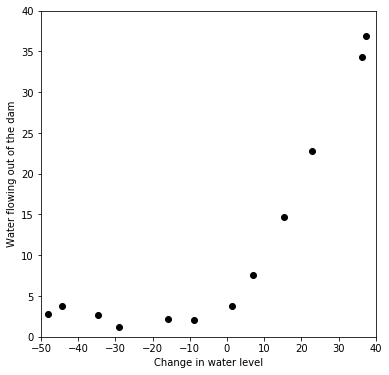

In [4]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_xlim(-50,40)
ax.set_ylim(0,40)
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
ax.plot(X,y,'ko')

## Reg Linear Regression

In [5]:
m = np.shape(X)[0]
m

12

In [6]:
theta = np.ones((2,1))

In [7]:
def linRegCost(theta, X, y, lamda=0):
    """Returns the regularized linear cost function and gradient of X and y, where X and y are np arrays.
       X should already have a row of onesin the leftmost column."""
    
    theta = theta.reshape((theta.size,-1)) # reshaping theta to a 2D array for matrix math
  
    m = np.shape(y)[0] # number of training examples
    J = 0 # set initial cost
    grad = np.zeros(np.shape(theta))
    
    J = 1 / (2 * m) * sum((X.dot(theta) - y) ** 2) + lamda / (2 * m) * theta[1:,:].T.dot(theta[1:,:])
    
    grad[0,:] = 1 / m * np.dot(X[:,0].T, (X.dot(theta) - y))
    grad[1:,:] = 1 / m * np.dot(X[:,1:].T, (X.dot(theta) - y)) + lamda / m * theta[1:,:]
    
    return J, grad

In [8]:
a, b = linRegCost(theta, np.insert(X,0,1,1), y, 1)
print(a)
print(b)

[[ 303.99319222]]
[[ -15.30301567]
 [ 598.25074417]]


In [9]:
results = optimize.fmin_tnc(linRegCost, fprime=None, x0=theta, args=(np.insert(X,0,1,1), y, 0))
results

(array([ 13.08790358,   0.36777923]), 9, 1)

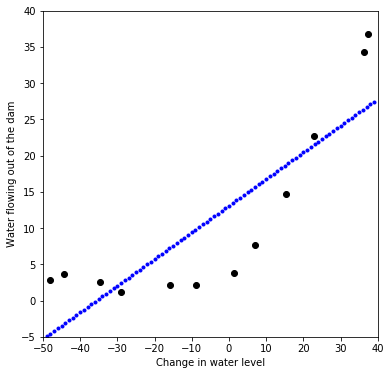

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(X,y,'ko')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
ax.set_xlim(-50,40)
ax.set_ylim(-5,40)

xrange = list(range(-50,40,1))
yrange = [results[0][0] + results[0][1] * x for x in xrange]
plt.plot(xrange, yrange, 'b.')

## Learning Curves

In [11]:
def learningCurves(theta, X, y, Xval, yval, lamda=0):
    """Plots the learning curves of the regularized linear regression for every sub-size of the training set.
       lamda only impacts the training of theta."""
    
    m = np.shape(y)[0] # number of training examples
    training = []
    cv = []
    
    for i in range(1,m+1):
        
        # Fit on subset of training data
        results = optimize.fmin_tnc(linRegCost, fprime=None, x0=theta, args=(np.insert(X[0:i,:],0,1,1), y[0:i,:], lamda))
        theta1 = results[0].reshape(results[0].size,-1)
        
        # Calculate training error
        training_error = linRegCost(theta1, np.insert(X[0:i,:],0,1,1), y[0:i,:], 0)
        training.append(np.asscalar(training_error[0]))
        
        # Calculate cross-validation error
        cv_error = linRegCost(theta1, np.insert(Xval,0,1,1), yval, 0)
        cv.append(np.asscalar(cv_error[0]))
        
    # Plot learning curves
    xrange = list(range(1,m+1))
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.plot(xrange, training, 'b-')
    plt.plot(xrange, cv, 'g-')
    

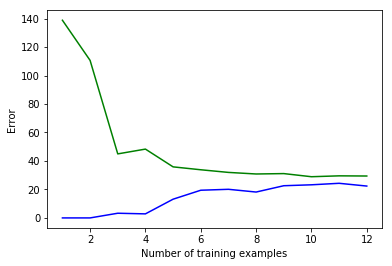

In [12]:
learningCurves(theta, X, y, Xval, yval, 1)

## Polynomial Regression

In [13]:
def polyFeatures(X, p):
    """For each row in X, sets X_poly to X^1, X^2...X^p, where p is the highest degree of polynomial. Does not insert 
       ones on the lefthand column."""
    
    X_poly = np.zeros((X.shape[0], p))
    
    for i in range(1,p+1):
        X_poly[:,i-1] = X[:,0] ** i
        
    return X_poly

In [14]:
def featureNormalize(X):
    """Normalized X by subtracting the mean values of columns from each element of the column, and then dividing the 
       values of the column by the column's standard deviation."""
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X,axis=0,ddof=1)
    X_norm = np.divide(X - mu, sigma)
    
    return X_norm, mu, sigma

In [15]:
featureNormalize(polyFeatures(X,3)) # testing

(array([[ -3.62140776e-01,  -7.55086688e-01,   1.82225876e-01],
        [ -8.03204845e-01,   1.25825266e-03,  -2.47936991e-01],
        [  1.37746700e+00,   5.84826715e-01,   1.24976856e+00],
        [  1.42093988e+00,   7.06646754e-01,   1.35984559e+00],
        [ -1.43414853e+00,   1.85399982e+00,  -2.03716308e+00],
        [ -1.28687086e-01,  -9.75968776e-01,   2.51385075e-01],
        [  6.80581552e-01,  -7.80028951e-01,   3.40655738e-01],
        [ -9.88534310e-01,   4.51358004e-01,  -6.01281871e-01],
        [  2.16075753e-01,  -1.07499276e+00,   2.66275156e-01],
        [ -1.31150068e+00,   1.42280595e+00,  -1.54812094e+00],
        [  4.03776736e-01,  -1.01501039e+00,   2.73378511e-01],
        [  9.29375305e-01,  -4.19807932e-01,   5.10968368e-01]]),
 array([ -5.08542635e+00,   8.48904834e+02,  -1.28290173e+04]),
 array([  2.99644020e+01,   7.87889103e+02,   4.81896178e+04]))

In [16]:
degree = 8
X_poly, mu, sigma = featureNormalize(polyFeatures(X,degree))
X_poly_test = (polyFeatures(Xtest,degree) - mu) / sigma
X_poly_val = (polyFeatures(Xval,degree) - mu) / sigma

In [17]:
def trainLinearReg(X, y, lamda=0):

    init_theta = np.zeros((X.shape[1] + 1,1))
    
    results = optimize.fmin_tnc(linRegCost, fprime=None, x0=init_theta, args=(np.insert(X,0,1,1), y, lamda))
    
    theta = results[0]
      
    return theta

In [18]:
theta1 = trainLinearReg(X_poly, y, 0).reshape(-1,1)
theta1

array([[ 11.21755225],
       [ 10.77208742],
       [ 20.89306893],
       [ 18.07330702],
       [-40.71040735],
       [-44.31361327],
       [ 37.0273915 ],
       [ 35.64990166],
       [ -3.22171319]])

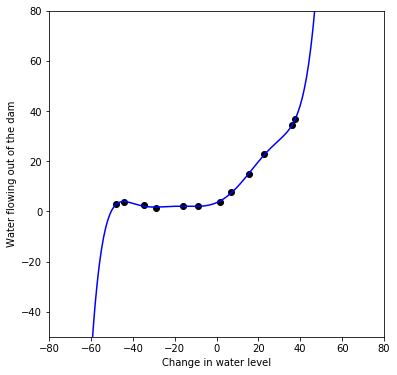

In [19]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(X,y,'ko')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
ax.set_xlim(-80,80)
ax.set_ylim(-50,80)

xrange = np.reshape(np.arange(-80,65,1),(-1,1))
xx = (polyFeatures(xrange,degree) - mu) / sigma
yrange = np.dot(np.insert(xx,0,1,1), theta1)
plt.plot(xrange, yrange, 'b-')

In [20]:
linRegCost(theta1, np.insert(X_poly,0,1,1), y, 0)

(array([[ 0.0429185]]), array([[ -3.70717026e-05],
        [  3.17468881e-03],
        [ -2.37717970e-03],
        [  2.12401865e-03],
        [  5.73276756e-04],
        [  7.81455505e-05],
        [  2.90221757e-03],
        [ -2.50466313e-03],
        [  3.93595090e-03]]))

Using fmin_tnc produces a different theta than the one in MATLAB. Below I have changed some definitions and am using fmin_cg. This produces a lower error.

In [21]:
def Jcost(theta, X, y, lamda=0):
    """Returns the regularized linear cost function and gradient of X and y, where X and y are np arrays.
       X should already have a row of onesin the leftmost column."""
    
    theta = theta.reshape((theta.size,-1)) # reshaping theta to a 2D array for matrix math
  
    m = np.shape(y)[0] # number of training examples
    J = 0 # set initial cost
    
    J = 1 / (2 * m) * sum((X.dot(theta) - y) ** 2) + lamda / (2 * m) * theta[1:,:].T.dot(theta[1:,:])
    
    return J

def Jgrad(theta, X, y, lamda=0):
    """Returns the regularized linear cost function and gradient of X and y, where X and y are np arrays.
       X should already have a row of onesin the leftmost column."""
    
    theta = theta.reshape((theta.size,-1)) # reshaping theta to a 2D array for matrix math
  
    m = np.shape(y)[0] # number of training examples
    grad = np.zeros(np.shape(theta))
    
    grad[0,:] = 1 / m * np.dot(X[:,0].T, (X.dot(theta) - y))
    grad[1:,:] = 1 / m * np.dot(X[:,1:].T, (X.dot(theta) - y)) + lamda / m * theta[1:,:]
    
    return grad.flatten()


init_theta = np.zeros((X_poly.shape[1] + 1,1))
theta2 = optimize.fmin_cg(Jcost, fprime=Jgrad, x0=init_theta, args=(np.insert(X_poly,0,1,1), y, 0))

Optimization terminated successfully.
         Current function value: 0.028892
         Iterations: 1076
         Function evaluations: 2068
         Gradient evaluations: 2068


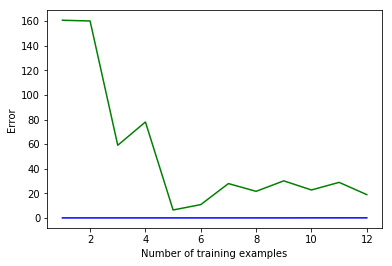

In [22]:
learningCurves(init_theta, X_poly, y, X_poly_val, yval, lamda=0)

Training error is very low, but CV error is still quite high. This means that the model is overfitting, and you should use regularization.

## Regularized Polynomial Linear Regression

#### lambda = 1

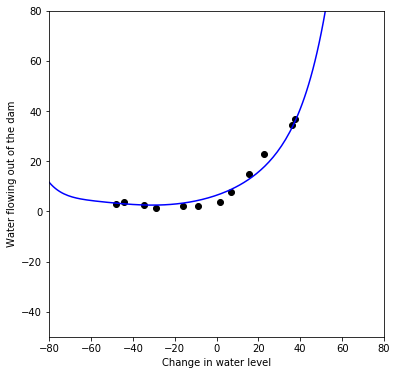

In [23]:
theta3 = trainLinearReg(X_poly, y, 1).reshape(-1,1)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(X,y,'ko')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
ax.set_xlim(-80,80)
ax.set_ylim(-50,80)

xrange = np.reshape(np.arange(-80,65,1),(-1,1))
xx = (polyFeatures(xrange,degree) - mu) / sigma
yrange = np.dot(np.insert(xx,0,1,1), theta3)
plt.plot(xrange, yrange, 'b-')

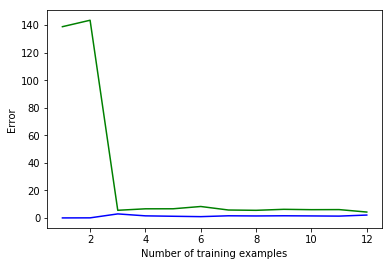

In [24]:
learningCurves(init_theta, X_poly, y, X_poly_val, yval, lamda=1)

This model does not have high variance or high bias problems. The training curves show a much lower error for the CV set, and there is not much of a gap.

#### lambda = 100

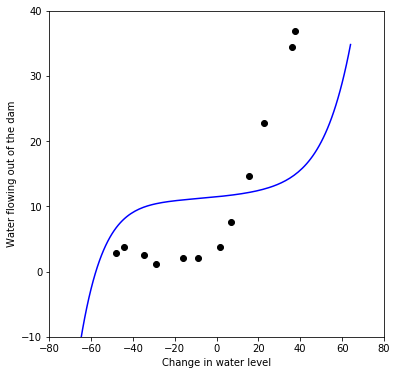

In [25]:
theta4 = trainLinearReg(X_poly, y, 100).reshape(-1,1)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(X,y,'ko')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
ax.set_xlim(-80,80)
ax.set_ylim(-10,40)

xrange = np.reshape(np.arange(-80,65,1),(-1,1))
xx = (polyFeatures(xrange,degree) - mu) / sigma
yrange = np.dot(np.insert(xx,0,1,1), theta4)
plt.plot(xrange, yrange, 'b-')

## Selecting Lambda Using Cross-Validation Set

In [26]:
def validationCurve(X, y, Xval, yval):
    """Finds the training and CV error for a model over a range of different lambda values."""
    
    lamda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    error_train = np.zeros((len(lamda_vec),1))
    error_cv = np.zeros((len(lamda_vec),1))
    
    for i in range(len(lamda_vec)):
        lamda = lamda_vec[i]
        theta = trainLinearReg(X, y, lamda).reshape(-1,1)
        error_train[i,0] = linRegCost(theta, np.insert(X,0,1,1), y, 0)[0]
        error_cv[i,0] = linRegCost(theta, np.insert(Xval,0,1,1), yval, 0)[0]
    
    return lamda_vec, error_train, error_cv
    

In [27]:
lamda_vec, error_train, error_cv = validationCurve(X_poly, y, X_poly_val, yval)

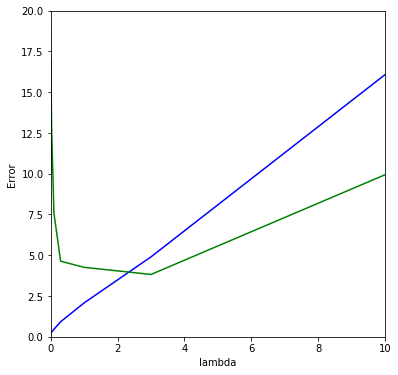

In [28]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.xlabel('lambda')
plt.ylabel('Error')
ax.set_xlim(0,10)
ax.set_ylim(0,20)
ax.plot(lamda_vec, error_train, 'b-')
ax.plot(lamda_vec, error_cv, 'g-')

From this, you see that the lowest cross validation error is with lambda=3. Next, we will test this on the test set and see what the error is.

In [29]:
theta5 = trainLinearReg(X_poly, y, 3).reshape(-1,1)
cost = linRegCost(theta5, np.insert(X_poly_test,0,1,1), ytest, 0)
print("Cost =", np.asscalar(cost[0]))

Cost = 3.859912158208825
